# Stock market analysis using data from the Yahoo-Finance Web API

## Libraries and settings

In [1]:
# Libraries
import os
import ta
import fnmatch
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt

# Define settings for graphics
# plt.style.use('dark_background')

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

/workspaces/data_ingestion/05_Yahoo_Finance_WebAPI


## Get data
List of stock market symbols: https://finance.yahoo.com/lookup

In [2]:
# Retrieve the Microsoft stock data from Yahoo finance
today = datetime.now().strftime("%Y-%m-%d")
print('Today is:', today)

data = yf.download('MSFT', start = "2022-01-01", end = today, progress=False)
data.tail()

Today is: 2024-10-21


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-14,417.769989,424.040009,417.519989,419.140015,419.140015,16653100
2024-10-15,422.179993,422.480011,415.260010,418.739990,418.739990,18900200
2024-10-16,415.170013,416.359985,410.480011,416.119995,416.119995,15508900
2024-10-17,422.359985,422.500000,415.589996,416.720001,416.720001,14820000
2024-10-18,417.140015,419.649994,416.260010,418.160004,418.160004,17138600


## Calculate techniqual indicators

In [3]:
# Function to compute Bollinger Bands 
def BBANDS(data, n):
    MA = data.Close.rolling(window=n).mean()
    SD = data.Close.rolling(window=n).std()
    data['MiddleBand'] = MA
    data['UpperBand'] = MA + (2 * SD) 
    data['LowerBand'] = MA - (2 * SD)
    return data
 
# Compute the Bollinger Bands for Google using the 50-day Moving average
BBANDS = BBANDS(data, 50)
BBANDS

,Open,High,Low,Close,Adj Close,Volume,MiddleBand,UpperBand,LowerBand
Date,,,,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,326.940826,28865100,NaN,NaN,NaN
2022-01-04,334.829987,335.200012,326.119995,329.010010,321.334747,32674300,NaN,NaN,NaN
2022-01-05,325.859985,326.070007,315.980011,316.380005,308.999390,40054300,NaN,NaN,NaN
2022-01-06,313.149994,318.700012,311.489990,313.880005,306.557770,39646100,NaN,NaN,NaN
2022-01-07,314.149994,316.500000,310.089996,314.040009,306.713959,32720000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-10-14,417.769989,424.040009,417.519989,419.140015,419.140015,16653100,417.9634,438.957511,396.969288
2024-10-15,422.179993,422.480011,415.260010,418.739990,418.739990,18900200,418.4352,438.370283,398.500116
2024-10-16,415.170013,416.359985,410.480011,416.119995,416.119995,15508900,418.7654,437.960983,399.569817


## Plot data and techniqual indicators

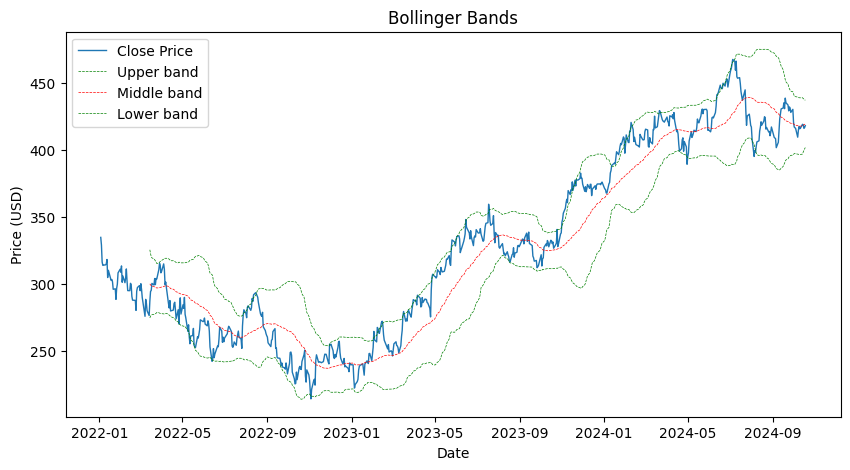

In [4]:
# Create the plot
plt.figure(figsize=(10, 5))

# Set the title and axis labels
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

plt.plot(BBANDS.Close, lw=1.0, label='Close Price')
plt.plot(data['UpperBand'], 'g--', lw=0.5, label='Upper band')
plt.plot(data['MiddleBand'], 'r--', lw=0.5, label='Middle band')
plt.plot(data['LowerBand'], 'g--', lw=0.5, label='Lower band')

# Add a legend to the axis
plt.legend()

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-15 11:27:03
Python Version: 3.11.10
-----------------------------------
